### To analyze market sentiment

**This module is to analyze market sentiment using NLP** 

Swing trading is to tap the potential investing opportunity in the market for short term. For example with chat GPT buzz in market hughe investments going in AI segment. NVDIA stock got premium over night with guidence of new business revenue which can't be traced by historical data . This module is to find sentiment and build swing trading strategy based on news.

The stock market heavily influenced by the news and eranings guidance it can be any important thing about the company such as new contract , prjected growth, expected down fall of revenues , new business line, strong manager/CEO hired/fired , etc.). This module is to gauge  sentiment that impact financial results quarterly and annual earnings, profits , etc. and compare with analysts expectations .
This module automatically the list of news using the newsapi API, apply sentiment analysis, and compare the results with the stock/index prices 


 **News Api**: show the endpoints for get everything/ sources. Show how to get list of ids for only business English sources. Show the python wrapper and the functionality that is limited compared to the newsapi API . Free version has limited calls need licences for robust analysis
  
 **Sentiment analysis: introduce the library**
  using nltk we can analyze sentiment form text processing. NLTK is a leading platform for building Python programs to work with human language data.

**The idea:** analyse one event with the news sentiment

Get one request for Apple or any stock from the portfolio and get the news
and build Sentiment analyzer for comparing the sentiment score vs. Stock rise and speculate what articles may influenced its growth 
 


In [ ]:
!pip install newsapi-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',1000)
import yfinance as yf

In [ ]:
def get_sources(category = None):
  newsapi = NewsApiClient(api_key='1900869fa01647fca0bdc19b4550daa0')
  sources = newsapi.get_sources()
  if category is not None:
    rez = [source['id'] for source in sources['sources'] if source['category'] == category and source['language'] == 'en']
  else:
    rez = [source['id'] for source in sources['sources'] if source['language'] == 'en']
  return rez

In [ ]:
get_sources('business')

['australian-financial-review',
 'bloomberg',
 'business-insider',
 'business-insider-uk',
 'financial-post',
 'fortune',
 'the-wall-street-journal']

In [ ]:
def get_articles_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
   
  newsapi = NewsApiClient(api_key='1900869fa01647fca0bdc19b4550daa0')
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  # business_en_sources = get_sources('business','en')
  if sources_list:
    articles = newsapi.get_everything(q=keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q=keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sort_by="relevancy",
                                      page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  seen = set()
  
  for article in articles['articles']:
    if str(article['title']) in seen:
      continue
    else:
      seen.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])
      
      sentiment = sia.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))
  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0],reverse=True)   
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])

In [ ]:
# GLOBAL PARAMS - for one event

SHOW_ALL_ARTICLES = True

STARTD = '9-Jul-2020'

KEYWRD = 'Apple Inc.'


#tiker
# tkr = "MSFT"
tkr = 'AAPL'
#tkr = 'AMZN'
# tkr = 'GOOG'

In [ ]:
import sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


0.096838
100
0                                                                                                                                                                                                               Oil prices rise on US crude, fuel stock draws  Reuters.com
1                                                                                                                                                                                             Analysis: Debt ceiling worries bubble up in US stock options market  Reuters
2     On Wednesday, a group of contractors at YouTube Music voted to unionize with the Alphabet Workers Union-Communications Workers of America (AWU-CWA). Out of the 49 workers who were eligible to vote, 41 voted in favor of the action, with the remaining eight abs…
3                                                                                                                                                      Despite the stock market's resilien

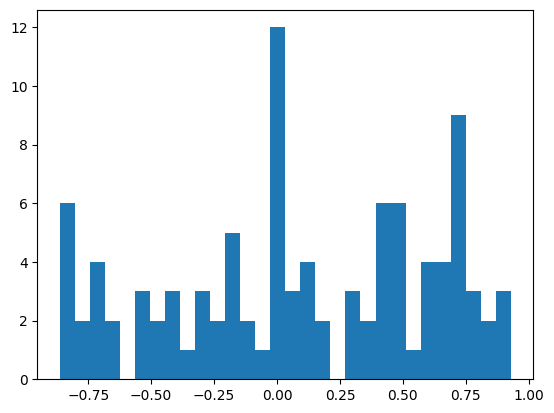

In [ ]:
return_articles = get_articles_sentiments(keywrd= 'stock' ,startd = '25-May-2023',sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30,grid=False)
print(return_articles.Sentiment.mean())
print(return_articles.Sentiment.count())
print(return_articles.Description)